In [1]:
import os
import csv
import sys
import random
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.metrics import roc_auc_score

pd.options.mode.chained_assignment = None  # default='warn'

%matplotlib inline

In [44]:
ll ../results/matched-on-text-strings/epoch*

-rw-r--r--@ 1 nick  staff  2638 Apr 19 23:06 ../results/matched-on-text-strings/epoch-results_0-AR-250_222_24_25_1e-06_512_16.csv
-rw-r--r--@ 1 nick  staff   785 Apr 18 10:01 ../results/matched-on-text-strings/epoch-results_0-AR_222_24_25_1e-06_256_32.csv
-rw-r--r--@ 1 nick  staff  2674 Apr 18 10:16 ../results/matched-on-text-strings/epoch-results_0-BW_222_24_25_1e-06_128_128.csv
-rw-r--r--@ 1 nick  staff   174 Apr 18 10:16 ../results/matched-on-text-strings/epoch-results_0_222_24_1_1e-06_16_1024.csv
-rw-r--r--@ 1 nick  staff  2648 Apr 18 10:16 ../results/matched-on-text-strings/epoch-results_0_222_24_25_1e-06_128_128.csv
-rw-r--r--@ 1 nick  staff   314 Apr 18 10:16 ../results/matched-on-text-strings/epoch-results_0_222_24_3_1e-06_16_1024.csv


In [48]:
# results_file = '../results/epoch-results_0-AR-30_222_24_25_1e-06_32_512.csv'
results_file = '../results/epoch-results_0-AR-30_222_24_25_1e-06_64_256.csv'
# results_file = '../results/matched-on-text-strings/epoch-results_0-AR-250_222_24_25_1e-06_512_16.csv'
# results_file = '../results/matched-on-text-strings/epoch-results_0-AR_222_24_25_1e-06_256_32.csv'
# results_file = '../results/matched-on-text-strings/epoch-results_0_222_24_25_1e-06_128_128.csv'
df = pd.read_csv(results_file)
df.head()

,epoch,train_loss,train_accuracy,valid_loss,valid_accuracy,epoch_time
0,1,0.001872,0.798640,0.001111,0.850736,489.444026
1,2,0.000792,0.876099,0.000778,0.876460,482.783217
2,3,0.000586,0.930473,0.000594,0.938907,477.609523
3,4,0.000440,0.958809,0.000484,0.951768,477.616441
4,5,0.000351,0.968405,0.000418,0.958792,477.517485


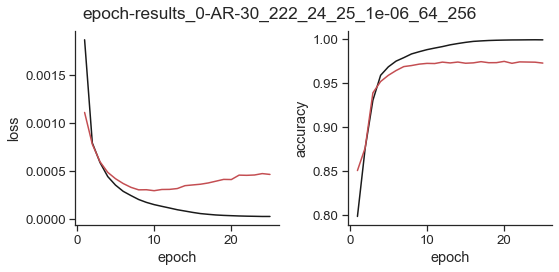

In [49]:
sns.set(style='ticks', font_scale=1.2)
plt.figure(figsize=(8,4))

suptitle = os.path.split(results_file)[-1].split('.')[0]

plt.suptitle(suptitle)

for i, key in enumerate(['loss', 'accuracy']):
    
    plt.subplot(1,2,i+1)
    
    plt.plot(df['epoch'], df[f'train_{key}'], 'k-')
    plt.plot(df['epoch'], df[f'valid_{key}'], 'r-')
    
    plt.xlabel('epoch')
    plt.ylabel(key)
    sns.despine()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig(f'../figures/training_performance_{suptitle}.pdf')

In [50]:
np.argmin(df['valid_loss'])

9